Please copy the notebook to your drive and write your code in it.

# New section

Import necessary libraries

In [623]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

Read Dataset from csv file

In [625]:
 df= pd.read_csv('Iris.csv')

Preview dataset

In [627]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Declare feature vector and target variable

In [629]:
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

In [631]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Replace categorical data with numbers

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'species'],
      dtype='object')

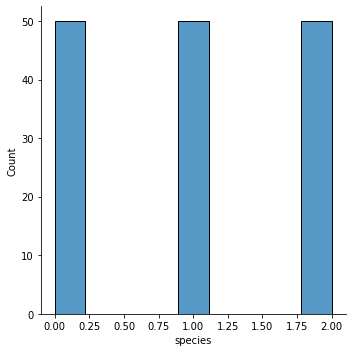

In [633]:
from sklearn.preprocessing import LabelEncoder

species = LabelEncoder()
df['species'] = species.fit_transform(df.iloc[:,-1])
df = df.drop("Species",axis=1)
x1 = df.iloc[:,1:-1]
y1 = df.iloc[:,-1]
sns.displot(y1)
df.columns

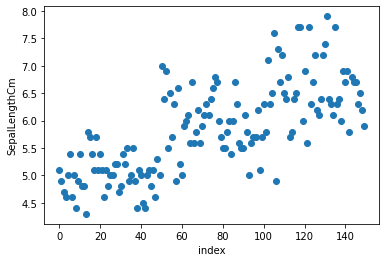

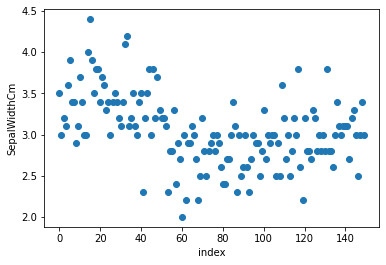

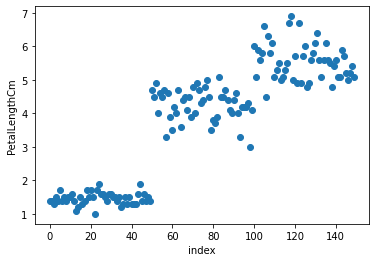

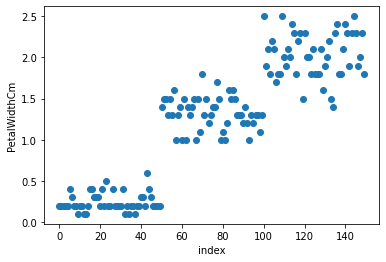

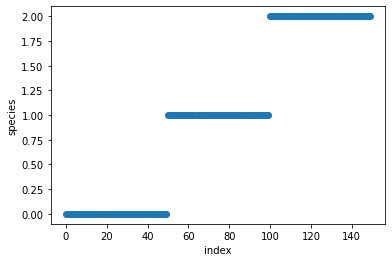

In [635]:
for i in df.columns:
  if i != "Id":
    plt.xlabel("index")
    plt.ylabel(i)
    plt.scatter(df.index,df[i])
    plt.show()
    print('\n')

Split data into train and test sets

In [637]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,shuffle= True)
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
11,4.8,3.4,1.6,0.2
102,7.1,3.0,5.9,2.1
39,5.1,3.4,1.5,0.2
71,6.1,2.8,4.0,1.3
134,6.1,2.6,5.6,1.4
...,...,...,...,...
49,5.0,3.3,1.4,0.2
99,5.7,2.8,4.1,1.3
106,4.9,2.5,4.5,1.7
96,5.7,2.9,4.2,1.3


Base estimator(Decision Tree classifier) : a weak learner with max_depth=2

In [639]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=2)

Fit weak classifier

In [641]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

Calculate the accuracy by the weak learner

In [643]:
print(clf.score(x_test,y_test))

0.9666666666666667


Build the AdaBoost model with the the above decision tree and by increasing the number of trees from 1 to 5 with a step of 1 in the lines:

Hint:   
estimators = list(range(1, 5, 1))
for n_est in estimators:



In [645]:
from sklearn.ensemble import AdaBoostClassifier
estimators=list(range(100,1000,100))
ab=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),n_estimators=100)
ab.fit(x_train,y_train)
print(ab.score(x_test,y_test))



0.9666666666666667


0.9666666666666667


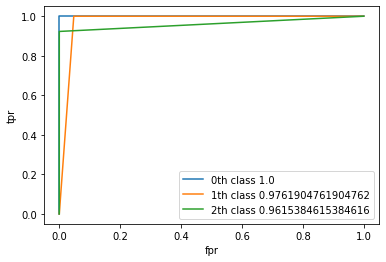

0.9666666666666667


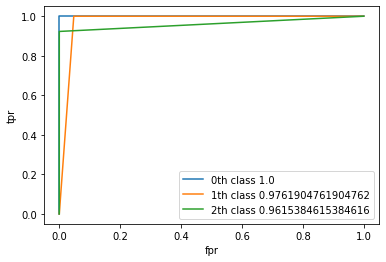

0.9666666666666667


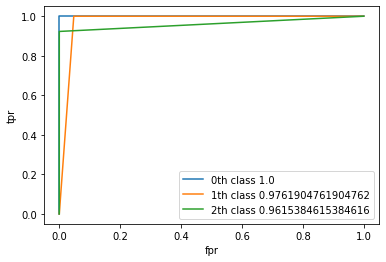

0.9333333333333333


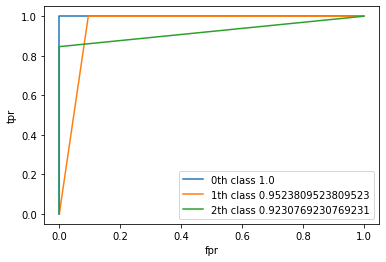

0.9666666666666667


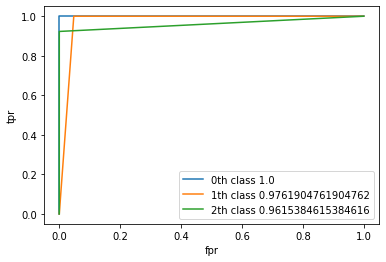

0.9333333333333333


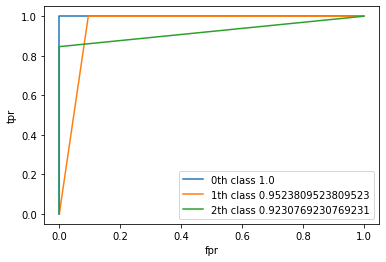

0.9333333333333333


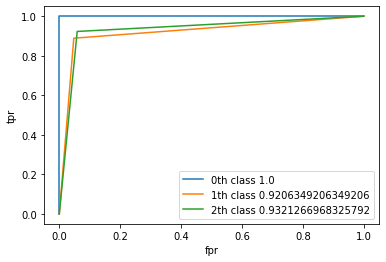

0.9666666666666667


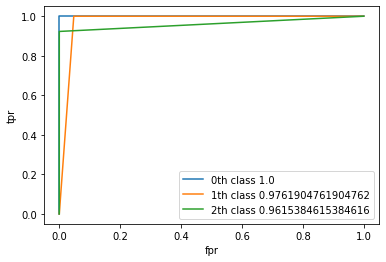

0.9666666666666667


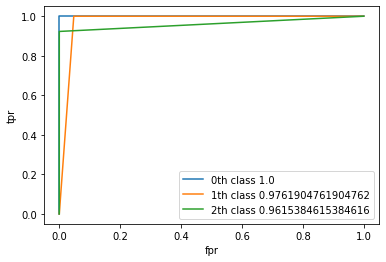

In [647]:
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
from sklearn.preprocessing import label_binarize
estimators = list(range(10,100,10))
for i in estimators:
    mm=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),n_estimators=i)
    mm.fit(x_train,y_train)
    print(mm.score(x_test,y_test))
    b1=label_binarize(np.array(y_test),classes=np.unique(y1))
    b2=label_binarize(np.array(mm.predict(x_test)),classes=np.unique(y1))
    n1=b1.shape[1]
    fpr={}
    tpr={}
    auc1={}
    for i in range(n1):
        fpr[i],tpr[i],thres=roc_curve(b1[:,i],b2[:,i])
        auc1[i]=auc(fpr[i],tpr[i])
    for i in range(n1):
        plt.plot(fpr[i],tpr[i],label=f"{i}th class {auc1[i]}")
        plt.legend()
        plt.xlabel('fpr')
        plt.ylabel('tpr')
    plt.show()

Plot the model performance

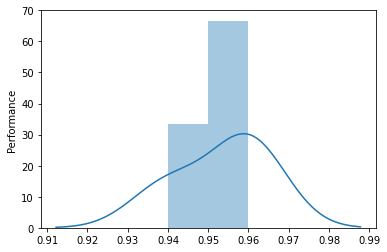

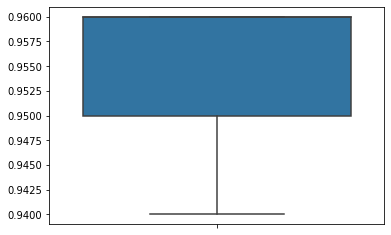

0.9533333333333333


In [649]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(ab,x1,y1,cv=3)
sns.distplot(a)
plt.ylabel("Performance")
plt.show()
sns.boxplot(y = a)
plt.show()

print(a.mean())

#Bayes Classfication

# New Section

Import modules

In [651]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve,auc
nb = GaussianNB()

Naive Bayes algorithm using 5-fold cross validation 

overall mean accuracy is :  0.9533333333333334


Text(0, 0.5, 'Sores of cross validation')

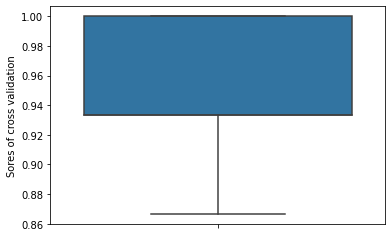

In [653]:
s = cross_val_score(nb,x1,y1,cv = 10)
print("overall mean accuracy is : ", np.array(s).mean())
sns.boxplot(y = s)
plt.ylabel("Sores of cross validation")

Plot the ROC AUC curve

Score:  0.9666666666666667
ROC-AUC SCORE:  1.0
[[ 8  0  0]
 [ 0  9  0]
 [ 0  1 12]]


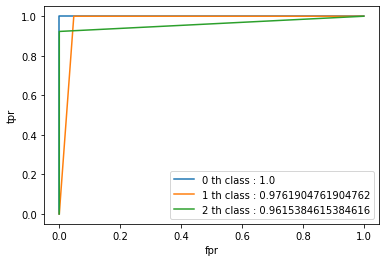

In [655]:
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
nb.fit(x_train,y_train) #fitted the model
b=nb.predict(x_test) 
print("Score: ",nb.score(x_test,y_test))
print("ROC-AUC SCORE: ",roc_auc_score(np.array(y_test),nb.predict_proba(x_test),multi_class="ovr"))
print(confusion_matrix(y_test,b))
b1 = label_binarize(np.array(y_test),classes = np.unique(y1))
b2 = label_binarize(np.array(b),classes = np.unique(y1))
n_classes = b1.shape[1]
fpr = dict()
tpr = dict()
auc_ = dict()
for i in range(n_classes):
  fpr[i],tpr[i] ,thres = roc_curve(b1[:,i],b2[:,i])
  auc_[i] = auc(fpr[i],tpr[i])
for i in range(n_classes):
  plt.plot(fpr[i],tpr[i],label = f'{i} th class : {auc_[i]}')
  plt.legend()
  plt.xlabel('fpr')
  plt.ylabel('tpr')


   





Use logarithmic discriminant function to compute accuracy

In [657]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ld = LinearDiscriminantAnalysis(n_components=1)
ld.fit(x_train,y_train)

ld.score(x_test,y_test)

0.9666666666666667

Bayes risk

[15.27272727272727, 15.27272727272727, 17.91176470588235, 17.91176470588235, 12.0, 15.27272727272727, 12.0, 15.27272727272727, 12.0, 17.91176470588235, 15.27272727272727, 17.91176470588235, 17.91176470588235, 17.91176470588235, 12.0, 17.91176470588235, 17.91176470588235, 17.91176470588235, 15.27272727272727, 15.27272727272727, 15.27272727272727, 12.0, 12.0, 12.0, 15.27272727272727, 17.91176470588235, 15.27272727272727, 17.91176470588235, 12.0, 17.91176470588235]


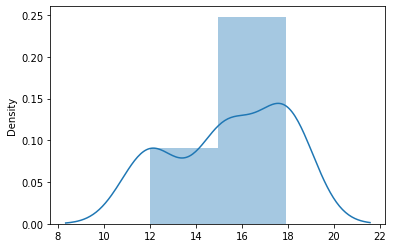

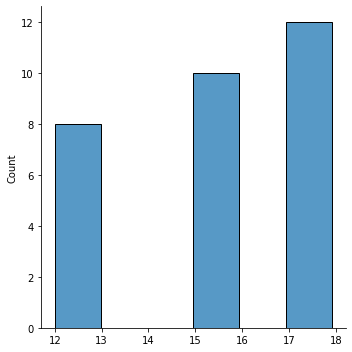

In [659]:
mat = [[1,2,3],[4,5,6],[7,8,9]]
p=clf.predict_proba(x_test)
risk=[]
c=0

for i,j,k in p:
  sum=0
  for t in range(3):
    sum+=(i*mat[t][0]+j*mat[t][1]+k*mat[t][2])
  risk.append(sum)
print(risk)

sns.distplot(risk)
plt.show()
sns.displot(risk)

  

  



In [661]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

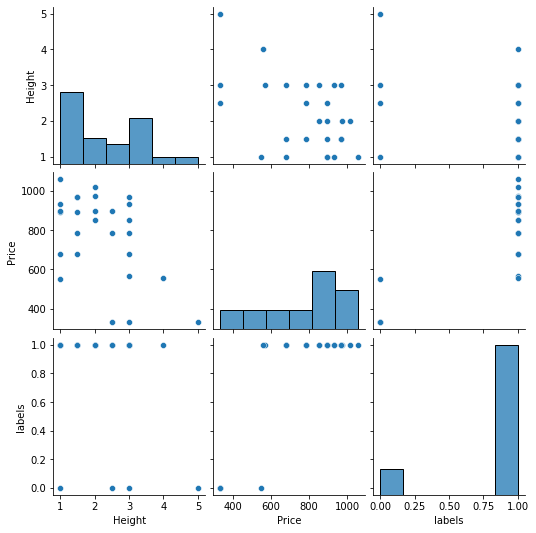

In [663]:

df1=pd.read_csv("Data.csv")

label = []

x_c1 = []
x_c2 = []
c1_count = 0
c2_count = 0
data=np.array(df1)
for i in range(data.shape[0]):
  if(data[i][1] > 550):
    label.append(1)
    x_c1.append(data[i][0])
    c1_count += 1
  else:
    label.append(0)
    x_c2.append(data[i][0])
    c2_count += 1
df1["labels"]=label
sns.pairplot(df1)

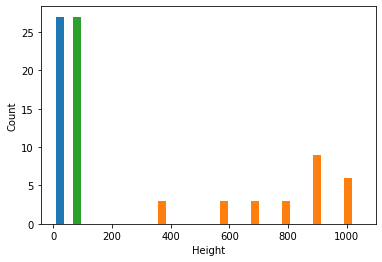

(array([ 4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 23.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

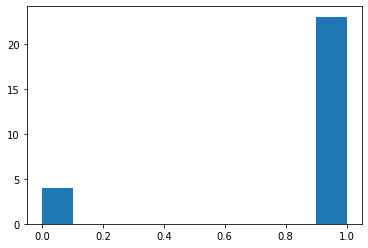

In [665]:

plt.hist(df1)
plt.xlabel("Height")
plt.ylabel("Count")
plt.show()


plt.hist(label)

In [667]:
total_no_of_samples = len(data)
#calculating 
prob_c1 = c1_count/total_no_of_samples
prob_c2 = c2_count/total_no_of_samples
print("Prior Class 1:",prob_c1)
print("Prior Class 2:",prob_c2)

Prior Class 1: 0.8518518518518519
Prior Class 2: 0.14814814814814814


(array([ 4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 23.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

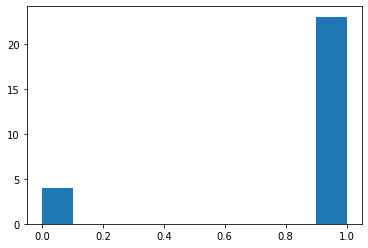

In [669]:
plt.hist(label)

In [671]:
from collections import Counter
unique_c1 = Counter(x_c1).keys() 
count_unique_c1 = list(Counter(x_c1).values()) 
unique_c2 = Counter(x_c2).keys() 
count_unique_c2 = list(Counter(x_c2).values())
count_unique_c2

[1, 1, 1, 1]

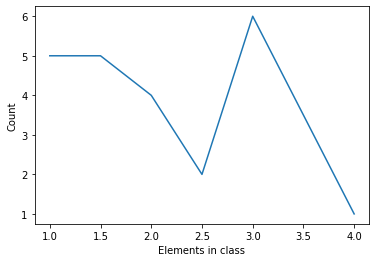

In [673]:
sns.lineplot(list(unique_c1),count_unique_c1)
plt.xlabel("Elements in class")
plt.ylabel("Count")
plt.show()

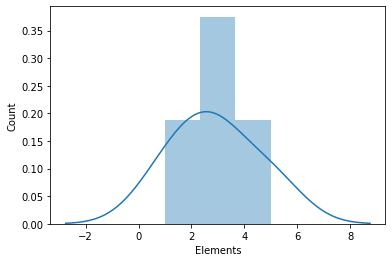

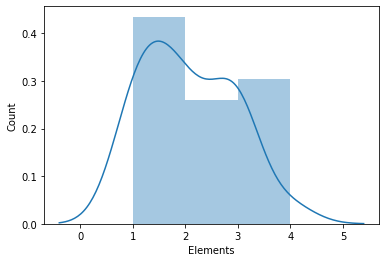

In [675]:
#Probability distribution of x_c2
sns.distplot(x_c2)
plt.xlabel("Elements")
plt.ylabel("Count")
plt.show()
#Probability distribution of x_c1


sns.distplot(x_c1)
plt.xlabel("Elements")
plt.ylabel("Count")
plt.show()

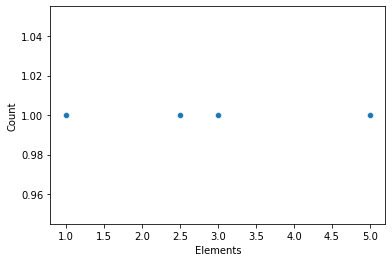

In [677]:
#scatter plot
sns.scatterplot(list(unique_c2),count_unique_c2)

plt.xlabel("Elements")

plt.ylabel("Count")

plt.show()

No handles with labels found to put in legend.


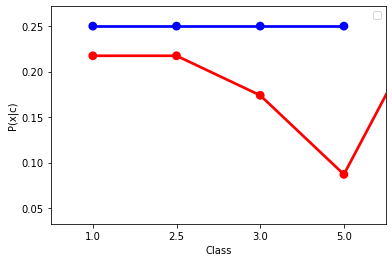

In [679]:
#plotting P(x|c)
fig1 = np.array(count_unique_c1)/len(x_c1)
sns.pointplot(list(unique_c1),fig1, linestyles="-",markers =['o'],color="red" )
fig2 = np.array(count_unique_c2)/len(x_c2)
sns.pointplot(list(unique_c2),fig2,linestyles='-',markers=['o'],color="blue")
plt.xlabel("Class")
plt.ylabel("P(x|c)")
plt.legend()
plt.show()

array([0.26086957, 0.04347826, 0.17391304, 0.2173913 , 0.2173913 ,
       0.08695652])

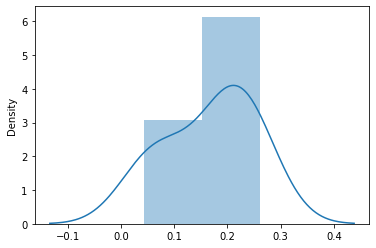

In [681]:
p_c1=np.array((count_unique_c1))/c1_count
p_c2=np.array((count_unique_c2))/c2_count
sns.distplot(p_c1)
p_c1

In [683]:
#postprior probabilities
postprior_c1=p_c1*prob_c1
postprior_c2=p_c2*prob_c2
print(postprior_c1)
print(postprior_c2)

[0.22222222 0.03703704 0.14814815 0.18518519 0.18518519 0.07407407]
[0.03703704 0.03703704 0.03703704 0.03703704]


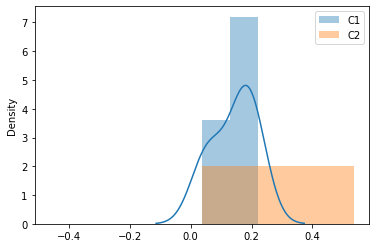

In [685]:
sns.distplot(postprior_c1,label="C1")
sns.distplot(postprior_c2,label="C2")
plt.legend()
plt.show()

[Decision Tree](https://https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Adaboost Explaination](https://https://towardsdatascience.com/understanding-adaboost-2f94f22d5bfe)

[Adaboost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

[Naive Bayes](https://https://scikit-learn.org/stable/modules/naive_bayes.html)


[Discriminant function analysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)







DATASET 2

In [687]:
df3=pd.read_csv("c1.csv")
df4=pd.read_csv("c2.csv")
df3.head()

,x1,x2
0,0.320478,0.481092
1,0.050691,0.096400
2,3.748470,0.403931
3,2.256374,2.089962
4,1.421454,1.243629


In [689]:
df3.shape

(160, 2)

In [691]:
df4.shape

(39, 2)

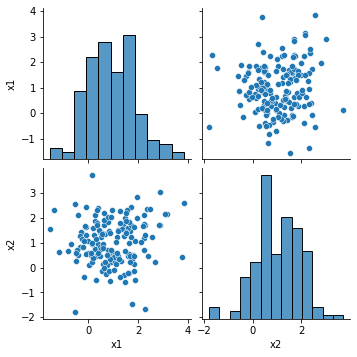

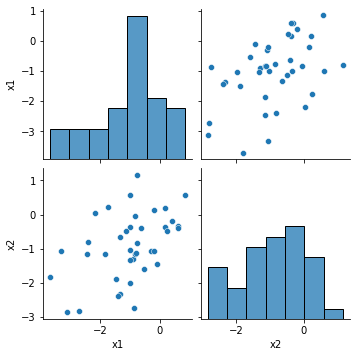

In [693]:
sns.pairplot(df3)
plt.show()
sns.pairplot(df4)

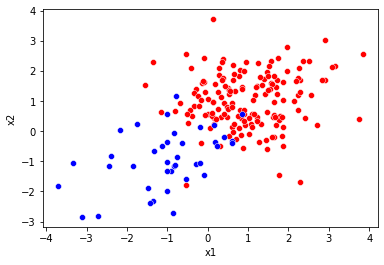

In [695]:
#scatter plot
sns.scatterplot(df3.iloc[:,0],df3.iloc[:,1],color="red")
sns.scatterplot(df4.iloc[:,0],df4.iloc[:,1],color="blue")
plt.show()

Prior class 1:  0.8040201005025126
Prior class 2:  0.19597989949748743


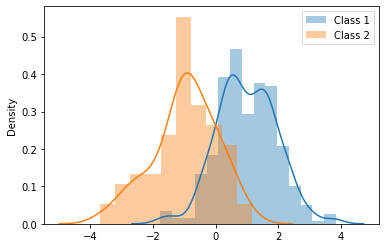

In [697]:
total=df3.shape[0]+df4.shape[0]
p1=df3.shape[0]/total
p2=df4.shape[0]/total
print("Prior class 1: ",p1)
print("Prior class 2: ",p2)
sns.distplot(df3,label="Class 1")
sns.distplot(df4,label="Class 2")
plt.legend()
plt.show()

In [699]:
x1=df3.iloc[:,0]
x2=df4.iloc[:,0]
# y1-df4.iloc[:,0]
# y2=df4.iloc[:,1]
unq_c1=Counter(x1).keys()
unq_c2=Counter(x2).keys()
cnt_c1=list(Counter(x1).values())
cnt_c2=list(Counter(x2).values())
# unq2_c1=Counter(x1).keys()
# unq2_c2=Counter(x2).keys()
# cnt2_c1=list(Counter(x1).values())
# cnt2_c2=list(Counter(x2).values())



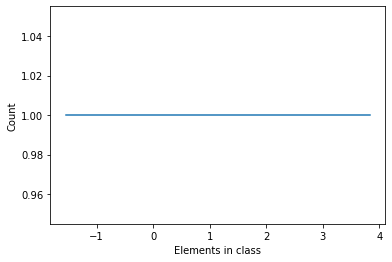

In [701]:
sns.lineplot(list(unq_c1),cnt_c1)
plt.xlabel("Elements in class")
plt.ylabel("Count")
plt.show()

In [703]:
prob_c1=np.array(cnt_c1)/df3.shape[0]
prob_c2=np.array(cnt_c2)/df4.shape[0]
print(prob_c1)
print(" ")
print(prob_c2)

[0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625
 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625
 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625
 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625
 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625
 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625
 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625
 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625
 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625
 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625
 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625
 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625
 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625
 0.00625 0.00625 0.00625 0.00625 0.00625 0.00625 0.

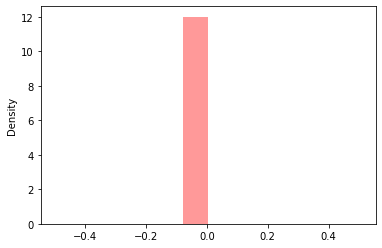

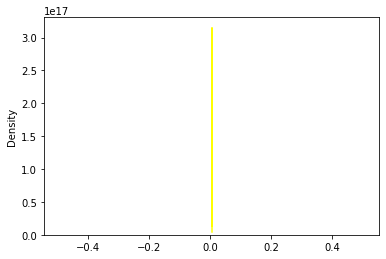

In [746]:
postprior_c1=p1*prob_c1
postprior_c2=p2*prob_c2
sns.distplot(postprior_c1,color="red")
plt.show()
sns.distplot(postprior_c2,color="yellow")
plt.show()

In [707]:
postprior_c1

array([0.00502513, 0.00502513, 0.00502513, 0.00502513, 0.00502513,
       0.00502513, 0.00502513, 0.00502513, 0.00502513, 0.00502513,
       0.00502513, 0.00502513, 0.00502513, 0.00502513, 0.00502513,
       0.00502513, 0.00502513, 0.00502513, 0.00502513, 0.00502513,
       0.00502513, 0.00502513, 0.00502513, 0.00502513, 0.00502513,
       0.00502513, 0.00502513, 0.00502513, 0.00502513, 0.00502513,
       0.00502513, 0.00502513, 0.00502513, 0.00502513, 0.00502513,
       0.00502513, 0.00502513, 0.00502513, 0.00502513, 0.00502513,
       0.00502513, 0.00502513, 0.00502513, 0.00502513, 0.00502513,
       0.00502513, 0.00502513, 0.00502513, 0.00502513, 0.00502513,
       0.00502513, 0.00502513, 0.00502513, 0.00502513, 0.00502513,
       0.00502513, 0.00502513, 0.00502513, 0.00502513, 0.00502513,
       0.00502513, 0.00502513, 0.00502513, 0.00502513, 0.00502513,
       0.00502513, 0.00502513, 0.00502513, 0.00502513, 0.00502513,
       0.00502513, 0.00502513, 0.00502513, 0.00502513, 0.00502

In [709]:
postprior_c2


array([0.00502513, 0.00502513, 0.00502513, 0.00502513, 0.00502513,
       0.00502513, 0.00502513, 0.00502513, 0.00502513, 0.00502513,
       0.00502513, 0.00502513, 0.00502513, 0.00502513, 0.00502513,
       0.00502513, 0.00502513, 0.00502513, 0.00502513, 0.00502513,
       0.00502513, 0.00502513, 0.00502513, 0.00502513, 0.00502513,
       0.00502513, 0.00502513, 0.00502513, 0.00502513, 0.00502513,
       0.00502513, 0.00502513, 0.00502513, 0.00502513, 0.00502513,
       0.00502513, 0.00502513, 0.00502513, 0.00502513])

In [711]:
df3
for i in range(df3.shape[0]):
    df3["class"]=1
df3
for i in range(df4.shape[0]):
    df4["class"]=2
df4
df5=pd.concat([df3,df4],axis=0)
df5

,x1,x2,class
0,0.320478,0.481092,1
1,0.050691,0.096400,1
2,3.748470,0.403931,1
3,2.256374,2.089962,1
4,1.421454,1.243629,1
...,...,...,...
34,-0.201574,-1.057435,2
35,-1.124155,-0.488612,2
36,0.600648,-0.382622,2
37,0.162933,0.200207,2


<Figure size 432x288 with 0 Axes>

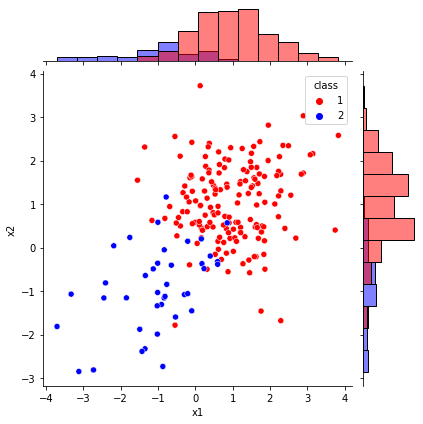

In [713]:
#f, axes = plt.subplots(ncols=2)
f=plt.figure()
f=sns.JointGrid(df5["x1"],df5["x2"],hue=df5["class"],palette=["red","blue"])
f.plot(sns.scatterplot,sns.histplot)
plt.show()
# graph = sns.jointplot(x=df3.x1, y=df3.x2, color='r')

# graph.x = df4.x1
# graph.y = df4.x2
# graph.plot_joint(plt.scatter, color='b')


3

In [715]:

dfx=df.drop(["SepalLengthCm","SepalWidthCm","PetalLengthCm","Id"],axis=1)
dfx


,PetalWidthCm,species
0,0.2,0
1,0.2,0
2,0.2,0
3,0.2,0
4,0.2,0
...,...,...
145,2.3,2
146,1.9,2
147,2.0,2
148,2.3,2


(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

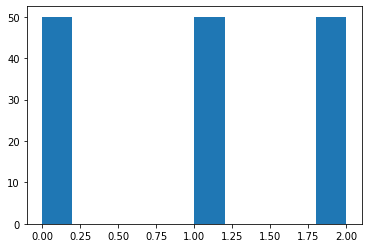

In [717]:
plt.hist(dfx.iloc[:,1])

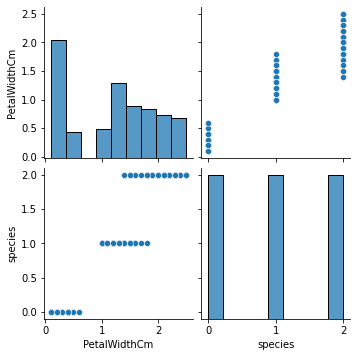

In [719]:
sns.pairplot(dfx)

In [721]:
xc1=[]
xc2=[]
xc3=[]
cnt1=0
cnt2=0

cnt3=0
data=np.array(dfx)
total=data.shape[0]
for i in range(total):
    if data[i][1]==0:
        cnt1+=1
        xc1.append(data[i][0])
    elif data[i][1]==1:
        cnt2+=1
        xc2.append(data[i][0])
    else:
        cnt3+=1
        xc3.append(data[i][0])
print(cnt1,cnt2,cnt3)

50 50 50


In [723]:
pc1=cnt1/total
pc2=cnt2/total
pc3=cnt3/total
print("Prior class 1: ",pc1)
print("Prior class 2: ",pc2)
print("Prior class 3: ",pc3)

Prior class 1:  0.3333333333333333
Prior class 2:  0.3333333333333333
Prior class 3:  0.3333333333333333


In [725]:
from collections import Counter
unique_c1 = Counter(xc1).keys() 
count_unique_c1 = list(Counter(xc1).values()) 
unique_c2 = Counter(xc2).keys() 
count_unique_c2 = list(Counter(xc2).values())
unique_c3 = Counter(xc3).keys() 
count_unique_c3 = list(Counter(xc3).values())
count_unique_c2

[7, 10, 13, 3, 7, 3, 1, 5, 1]

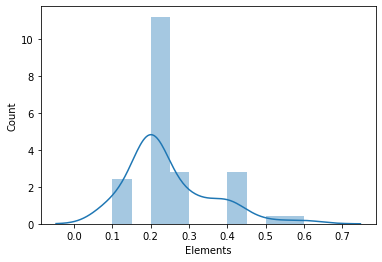

In [727]:
sns.distplot(xc1)
plt.xlabel("Elements")
plt.ylabel("Count")
plt.show()

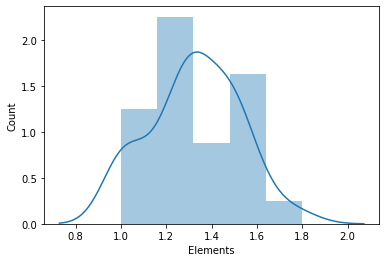

In [729]:
sns.distplot(xc2)
plt.xlabel("Elements")
plt.ylabel("Count")
plt.show()

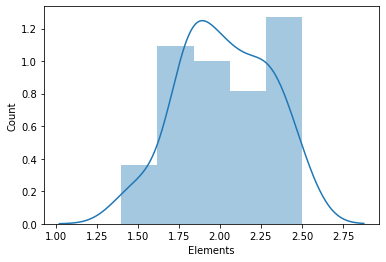

In [731]:
sns.distplot(xc3)
plt.xlabel("Elements")
plt.ylabel("Count")
plt.show()

No handles with labels found to put in legend.


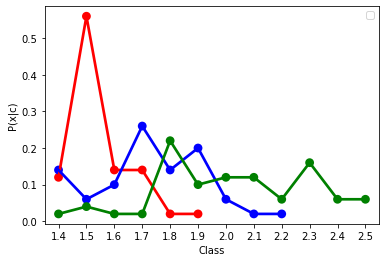

In [733]:
fig1 = np.array(count_unique_c1)/len(xc1)
sns.pointplot(list(unique_c1),fig1, linestyles="-",markers =['o'],color="red" )
fig2 = np.array(count_unique_c2)/len(xc2)
sns.pointplot(list(unique_c2),fig2,linestyles='-',markers=['o'],color="blue")
fig3 = np.array(count_unique_c3)/len(xc3)
sns.pointplot(list(unique_c3),fig3,linestyles='-',markers=['o'],color="green")
plt.xlabel("Class")
plt.ylabel("P(x|c)")
plt.legend()
plt.show()

In [735]:
prob1=np.array((count_unique_c1))/cnt1
prob2=np.array((count_unique_c2))/cnt2
prob2=np.array((count_unique_c3))/cnt3

In [737]:
post_c1=prob1*pc1
post_c2=prob1*pc2
post_c3=prob1*pc3

In [739]:
print(post_c1)

[0.18666667 0.04666667 0.04666667 0.04       0.00666667 0.00666667]


In [740]:
print(post_c2)

[0.18666667 0.04666667 0.04666667 0.04       0.00666667 0.00666667]


In [741]:
print(post_c3)

[0.18666667 0.04666667 0.04666667 0.04       0.00666667 0.00666667]


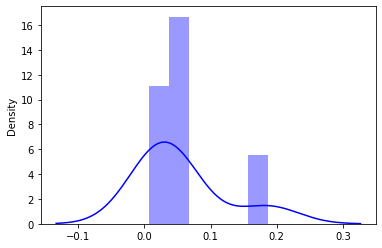

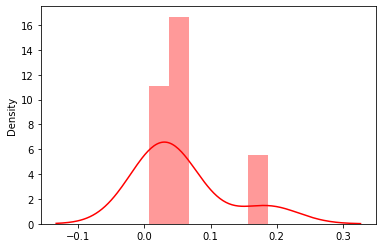

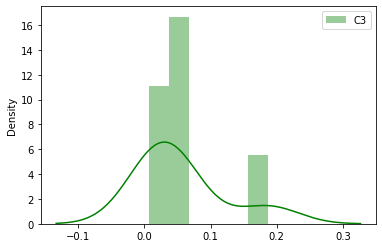

In [747]:
sns.distplot(post_c1,label="C1",color="b")
plt.show()
sns.distplot(post_c2,label="C2",color="r")
plt.show()
sns.distplot(post_c3,label="C3",color="g")
plt.legend()
plt.show()

<AxesSubplot:xlabel='species', ylabel='PetalWidthCm'>

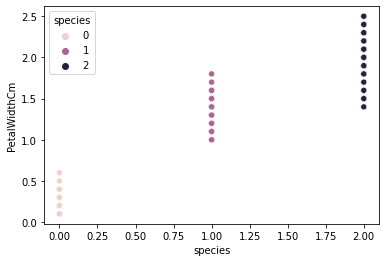

In [743]:
sns.scatterplot(data=dfx,x="species",y="PetalWidthCm",hue="species")

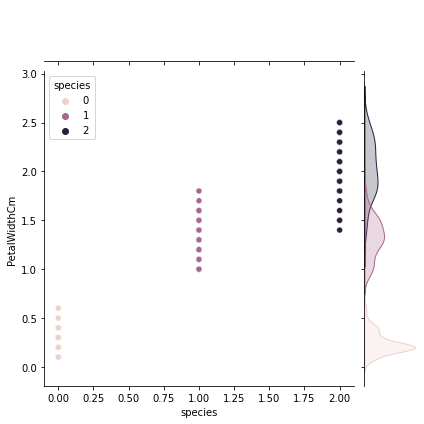

In [744]:
sns.jointplot(dfx.species,dfx.PetalWidthCm,hue=dfx.species)